<a href="https://colab.research.google.com/github/ngoan22mse23088/DigitalSignalProcessing/blob/master/Final%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirement
Thiết kế hệ thống xử lý số tín hiệu với các yêu cầu sau:

 a. Ghi âm đoạn giọng nói khoảng 30 giây. Phát tín hiệu ra loa. </br>
 b. Vẽ tín hiệu trong miền thời gian và miền tần số (tần số theo Hz). </br>
 c. Thiết kế bộ lọc số thông dải [0.1 3.4] KHz sử dụng cửa sổ Hamming. Vẽ đáp ứng tần số của bộ lọc (tần số theo Hz). </br>
 d. Vẽ tín hiệu ngõ ra trong miền thời gian và miền tần số (tần số theo Hz). Phát tín hiệu ra loa. </br>

## a. Ghi âm đoạn giọng nói khoảng 30 giây. Phát tín hiệu ra loa.

In [5]:
import requests
import wave

# URL của tệp âm thanh trên GitHub
url = 'https://github.com/ngoan22mse23088/DigitalSignalProcessing/raw/master/sample_29s.wav'

# Tải tệp âm thanh từ GitHub
response = requests.get(url)

# Kiểm tra xem tệp đã được tải về thành công
if response.status_code == 200:
    # Mở tệp âm thanh từ nội dung tải về
    with open('downloaded_audio.wav', 'wb') as audio_file:
        audio_file.write(response.content)

    # Đọc tệp âm thanh vừa tải về
    with wave.open('downloaded_audio.wav', 'rb') as wav_file:
        # Thực hiện xử lý tệp âm thanh tại đây (ví dụ: lấy thông tin về tệp âm thanh)
        print(f'Number of channels: {wav_file.getnchannels()}')
        print(f'Sample width: {wav_file.getsampwidth()} bytes')
        print(f'Sampling frequency: {wav_file.getframerate()} Hz')
        print(f'Number of frames: {wav_file.getnframes()}')
        print(f'Compression type: {wav_file.getcomptype()}')
        print(f'Compression name: {wav_file.getcompname()}')
else:
    print("Failed to download the audio file from GitHub.")


Number of channels: 1
Sample width: 2 bytes
Sampling frequency: 24000 Hz
Number of frames: 743517
Compression type: NONE
Compression name: not compressed


In [24]:
from IPython.display import Audio
Audio(filename='downloaded_audio.wav', autoplay=True)

## b. Vẽ tín hiệu trong miền thời gian và miền tần số (tần số theo Hz).

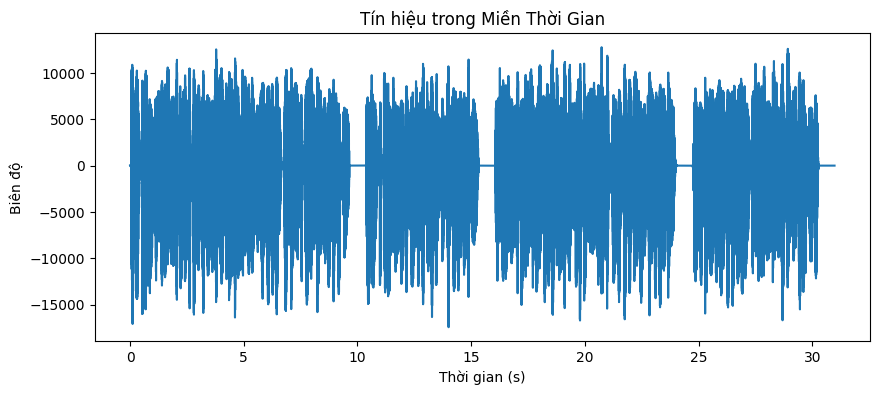

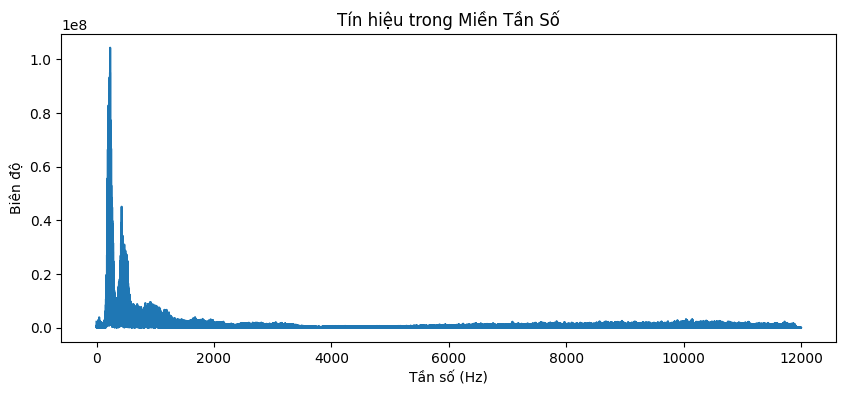

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Đọc tệp âm thanh
with wave.open('downloaded_audio.wav', 'rb') as wav_file:
    # Lấy dữ liệu âm thanh
    signal = wav_file.readframes(-1)  # Đọc toàn bộ dữ liệu âm thanh
    signal = np.frombuffer(signal, dtype='int16')  # Chuyển dữ liệu thành mảng numpy kiểu int16

    # Lấy thông số của tệp âm thanh
    framerate = wav_file.getframerate()  # Tần số lấy mẫu
    time = np.linspace(0, len(signal) / framerate, num=len(signal))  # Tạo mảng thời gian tương ứng

    # Vẽ biểu đồ tín hiệu trong miền thời gian
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)  # Vẽ biểu đồ
    plt.xlabel('Thời gian (s)')  # Đặt nhãn trục x
    plt.ylabel('Biên độ')  # Đặt nhãn trục y
    plt.title('Tín hiệu trong Miền Thời Gian')  # Đặt tiêu đề
    plt.show()  # Hiển thị biểu đồ

    # Vẽ biểu đồ tín hiệu trong miền tần số
    fft = np.fft.fft(signal)  # Biến đổi Fourier
    freq = np.fft.fftfreq(len(signal), 1 / framerate)  # Tạo mảng tần số
    freq = freq[:len(freq) // 2]  # Lấy một nửa đầu của mảng tần số
    fft = np.abs(fft[:len(fft) // 2])  # Lấy giá trị tuyệt đối và một nửa đầu của mảng biến đổi Fourier

    plt.figure(figsize=(10, 4))
    plt.plot(freq, fft)  # Vẽ biểu đồ
    plt.xlabel('Tần số (Hz)')  # Đặt nhãn trục x
    plt.ylabel('Biên độ')  # Đặt nhãn trục y
    plt.title('Tín hiệu trong Miền Tần Số')  # Đặt tiêu đề
    plt.show()  # Hiển thị biểu đồ

## c. Thiết kế bộ lọc số thông dải [0.1 3.4] KHz sử dụng cửa sổ Hamming. Vẽ đáp ứng tần số của bộ lọc (tần số theo Hz).

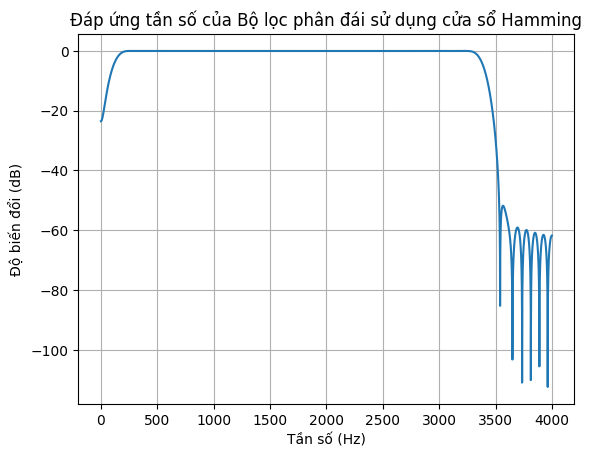

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Thiết lập thông số bộ lọc
fs = 8000  # Tần số lấy mẫu
f_low = 100  # Tần số cắt thấp (Hz)
f_high = 3400  # Tần số cắt cao (Hz)

# Tạo hệ số bộ lọc phân đái sử dụng cửa sổ Hamming
nyquist = 0.5 * fs
lowcut = f_low / nyquist
highcut = f_high / nyquist
numtaps = 101  # Độ dài bộ lọc

taps = signal.firwin(numtaps, [lowcut, highcut], pass_zero=False, window='hamming')

# Tính phản hồi tần số của bộ lọc
w, h = signal.freqz(taps, worN=8000)

# Vẽ đáp ứng tần số của bộ lọc
freq = w * fs / (2 * np.pi)
plt.plot(freq, 20 * np.log10(abs(h)))
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ biến đổi (dB)')
plt.title('Đáp ứng tần số của Bộ lọc phân đái sử dụng cửa sổ Hamming')
plt.grid()
plt.show()

## d.Vẽ tín hiệu ngõ ra trong miền thời gian và miền tần số (tần số theo Hz). Phát tín hiệu ra loa.

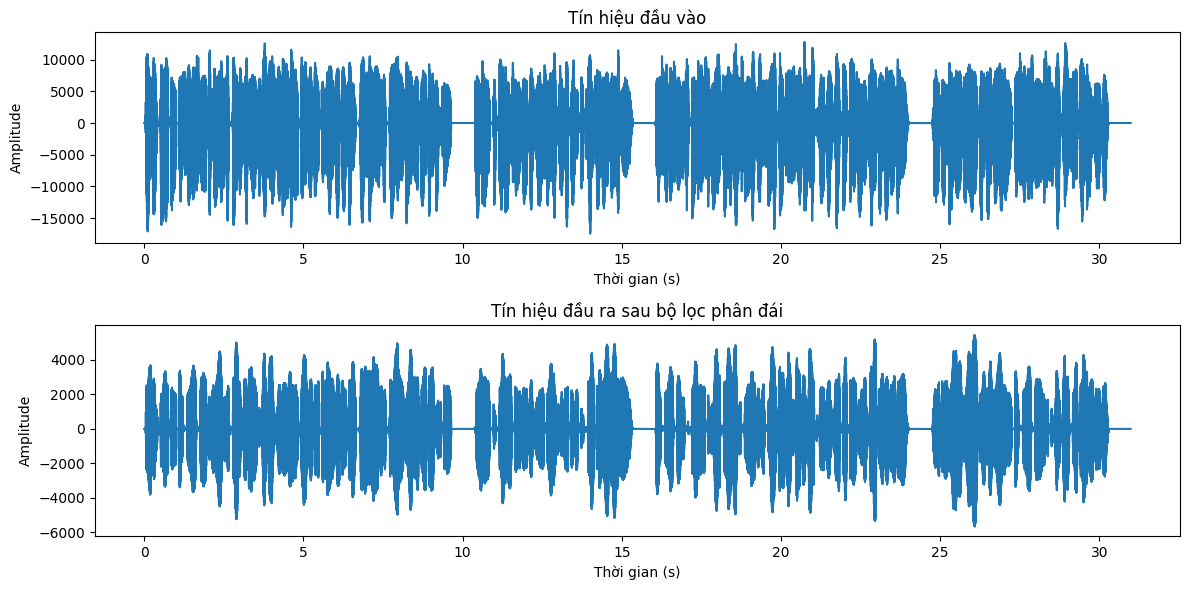

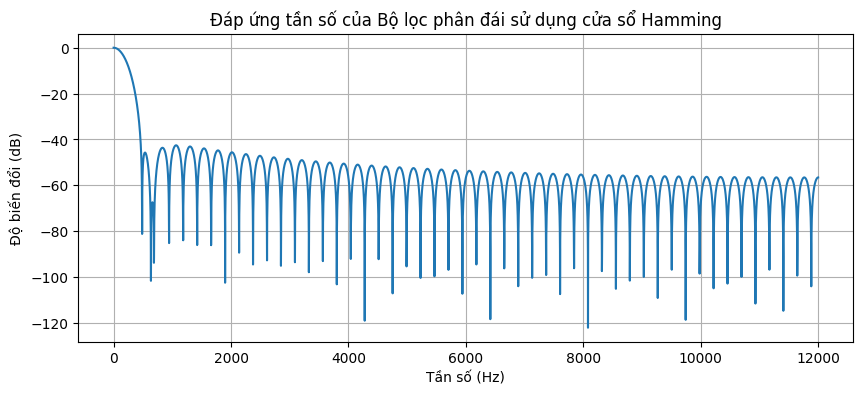

TypeError: ignored

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import wave
from IPython.display import Audio

# Đọc tệp âm thanh
wav_file = wave.open('downloaded_audio.wav', 'rb')
fs = wav_file.getframerate()
signal_data = wav_file.readframes(-1)
signal_data = np.frombuffer(signal_data, dtype='int16')

# Thiết lập thông số bộ lọc
f_low = 100  # Tần số cắt thấp (Hz)
f_high = 3400  # Tần số cắt cao (Hz)
N = 101  # Độ dài bộ lọc

# Tạo hệ số bộ lọc phân đái sử dụng cửa sổ Hamming
nyquist = 0.5 * fs
lowcut = f_low / nyquist
highcut = f_high / nyquist
taps = signal.firwin(N, [lowcut, highcut], pass_zero=False, fs=fs, window='hamming')

# Áp dụng bộ lọc phân đái
filtered_signal = signal.lfilter(taps, 1, signal_data)

# Vẽ tín hiệu đầu vào trong miền thời gian
time = np.arange(0, len(signal_data)) / fs
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal_data)
plt.xlabel('Thời gian (s)')
plt.ylabel('Amplitude')
plt.title('Tín hiệu đầu vào')

# Vẽ tín hiệu đầu ra trong miền thời gian
plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.xlabel('Thời gian (s)')
plt.ylabel('Amplitude')
plt.title('Tín hiệu đầu ra sau bộ lọc phân đái')

plt.tight_layout()
plt.show()

# Tính đáp ứng tần số của bộ lọc
w, h = signal.freqz(taps, worN=8000)
freq = w * fs / (2 * np.pi)

# Vẽ đáp ứng tần số của bộ lọc
plt.figure(figsize=(10, 4))
plt.plot(freq, 20 * np.log10(abs(h)))
plt.xlabel('Tần số (Hz)')
plt.ylabel('Độ biến đổi (dB)')
plt.title('Đáp ứng tần số của Bộ lọc phân đái sử dụng cửa sổ Hamming')
plt.grid()
plt.show()

# Phát tín hiệu đầu ra qua loa
Audio(filename=filtered_signal, autoplay=True)
# sd.play(filtered_signal, fs)
# sd.wait()